# Práctica 1 - Self-Organising Maps - COLORES
## Preparación de entorno
#### Importar librerías de código

In [17]:
# from __future__ import division

import random
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import pyplot as plt
from matplotlib import patches as patches

%matplotlib inline

#### Dataset que se va a utilizar para el entrenamiento

In [2]:
def calcEntrada():
    return 3
def numDatos():
    return 100

In [3]:
# Código para obtener el Dataset que se va a usar en el entrenamiento
numDatosColor = 100
datos = np.random.randint(0, 256, size=(numDatosColor, 3))

## SOM Setup
#### Variables definidas por el alumno

In [4]:
# Inicializa tamaño del mapa de Kohonen, número de iteraciones y learning rate
# Inicializa normalizar_datos dependiendo de si tienes que normalizar los datos o no
lado_mapa = 10
periodo = 10000
learning_rate = 0.1
normalizar_datos = True

#### A partir de este punto solo hay cálculos. No se introducen más valores "a mano"

In [5]:
# Establece el numero de entradas del mapa y el número de datos que se van a usar para entrenar. 
# Utiliza una función que obtenga automáticamente los valores a partir del Dataset.
num_entradas = calcEntrada()
num_datos = numDatos()

# Calcula el vecindario inicial. Debe ser la mitad del lado del mapa de Kohonen
vecindario = lado_mapa/2

# Normaliza los datos si fuese necesario dividiendo cada dato por el máximo en la matriz
if normalizar_datos:
    datos = datos/255
    
# Crea una matriz de pesos con valores random entre 0 y 1. Usa la función random.random de la librería NumPy
matriz_pesos = np.random.random(size=(lado_mapa, lado_mapa, 3))

#### Funciones para entrenar/clasificar

In [6]:
# Función para encontrar la BMU
"""
   Encuentra la BMU para un patrón de entrada.
   Entradas: (patrón_de_entrada, matriz_de_pesos, número_de_entradas)
   Salidas:  (bmu, bmu_idx) tupla donde
               bmu: vector de pesos de la neurona ganadora
               bum_idx: coordenadas de la neurona ganadora
"""

def dist(x, y):
    return sum(abs(x-y))

def distancia_euclidiana(x, y):
    return np.sqrt(np.sum((x - y)**2))

def calcular_bmu(entrada, pesos, num_entradas, num_rows, num_cols):
    winner = [0,0]
    shortest_distance = np.sqrt(datos.shape[1])
    for row in range(num_rows):
        for col in range(num_cols):
            distance = distancia_euclidiana(pesos[row][col], entrada)
            if distance < shortest_distance:
                shortest_distance = distance
                winner = [row, col]
    return winner, shortest_distance

In [7]:
# Función para calcular el descenso del coeficiente de aprendizaje (eta)
"""
   Calcula el Learning Rate (eta) que corresponde a la i-ésima presentación.
   Entradas: (learning_rate_inicial, iteracion, período)
   Salidas:  learning_rate para la iteración i

"""
def variacion_learning_rate(lr_inicial, i, n_iteraciones):
    lr_actual = lr_inicial*(1-(i/n_iteraciones))
    return lr_actual

In [8]:
# Función para calcular el descenso del vecindario (v)
"""
   Calcula el vecindario  (v) que corresponde a la i-ésima presentación.
   Entradas: (vecindario_inicial, iteracion, período)
   Salidas:  lvecindario para la iteración i

"""
def variacion_vecindario(vecindario_inicial, i, n_iteraciones):
    vecin_act = 1 + vecindario_inicial*(1 - (i/n_iteraciones))
    return vecin_act

In [9]:
# Función para calcular el descenso del coeficiente de aprendizaje (eta) en función de la distancia a la BMU
"""
   Calcula la amortiguación de eta en función de la distancia en el mapa entre una neurona y la BMU.
   Entradas: (distancia_BMU, vecindario_actual)
   Salidas:  amortiguación para la iteración

"""
def decay(distancia_BMU, vecindario_actual):
    return np.exp(-distancia_BMU**2 / (2*vecindario_actual**2))

#### Funciones para dibujar la salida de la red

In [10]:
# Función para pintar una matriz de valores como colores RGB
def pintar_mapa(matriz_valores, i):
    fig = plt.figure()
    
    # Establece ejes
    ax = fig.add_subplot(111, aspect='equal')
    ax.set_xlim((0, matriz_pesos.shape[0]+1))
    ax.set_ylim((0, matriz_pesos.shape[1]+1))
    ax.set_title('Self-Organising Map después de %d iteraciones' % i)

    # Dibuja los rectángulos de color RGB
    for x in range(1, matriz_valores.shape[0] + 1):
        for y in range(1, matriz_valores.shape[1] + 1):
            ax.add_patch(patches.Rectangle((x-0.5, y-0.5), 1, 1,
                         facecolor=matriz_valores[x-1,y-1, :],
                         edgecolor='none'))
    plt.show()

## SOM Entrenamiento

Mapa inicial


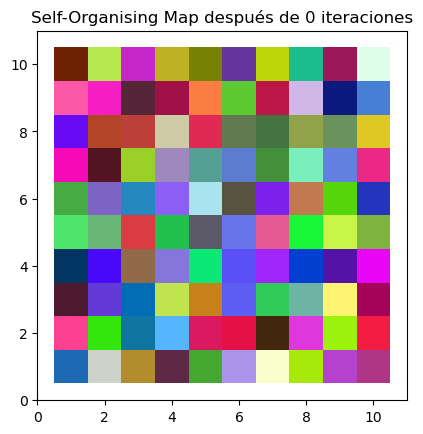

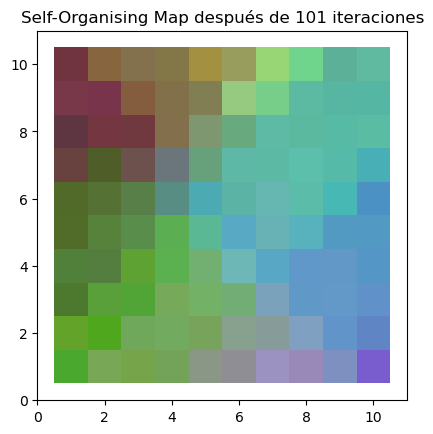

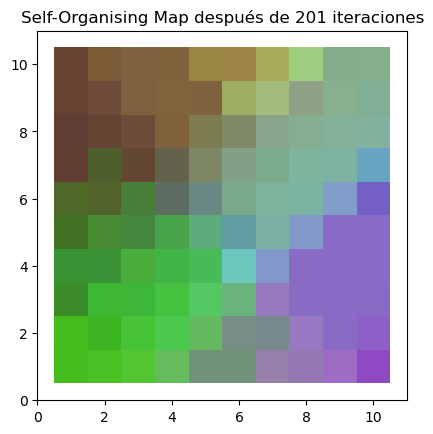

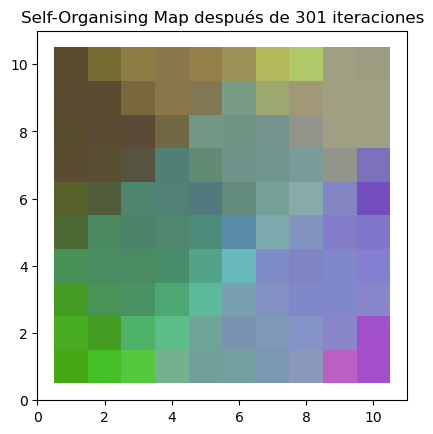

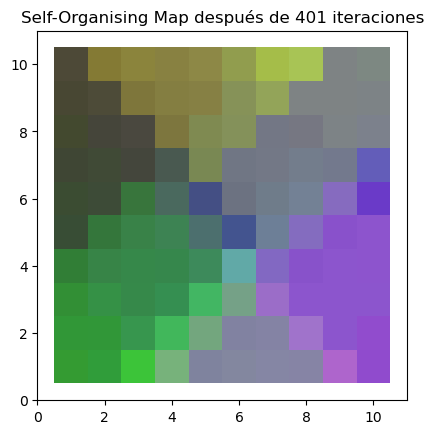

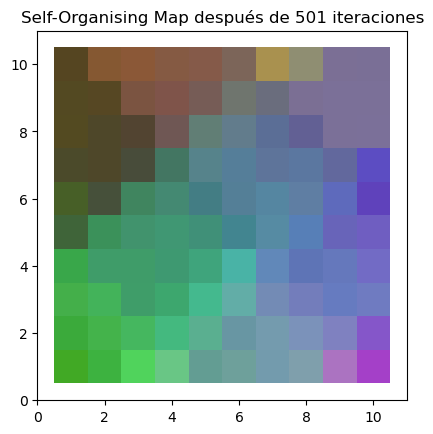

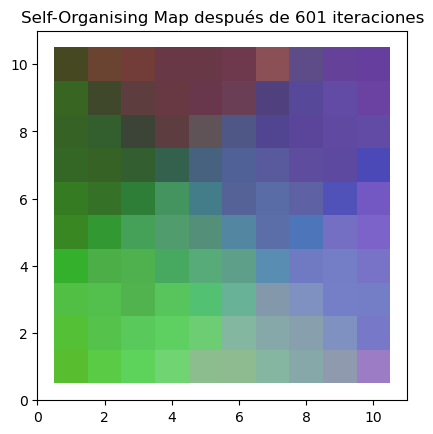

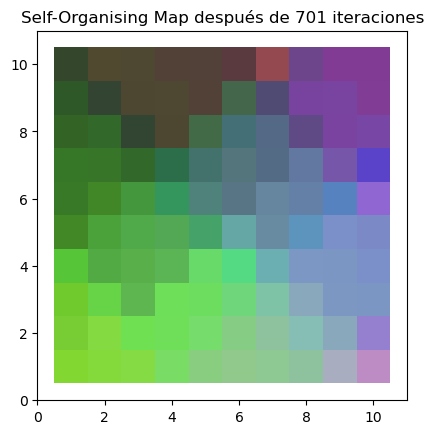

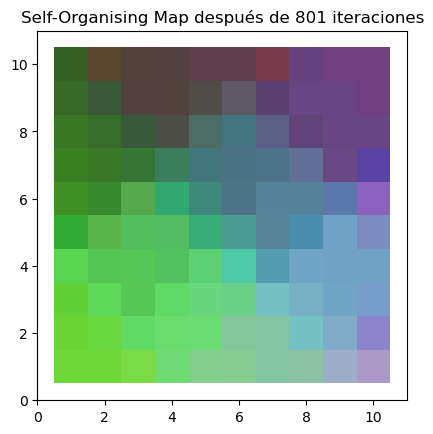

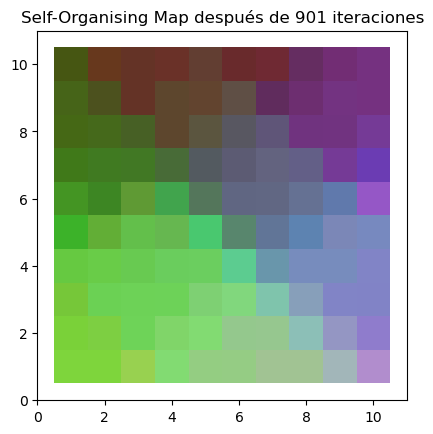

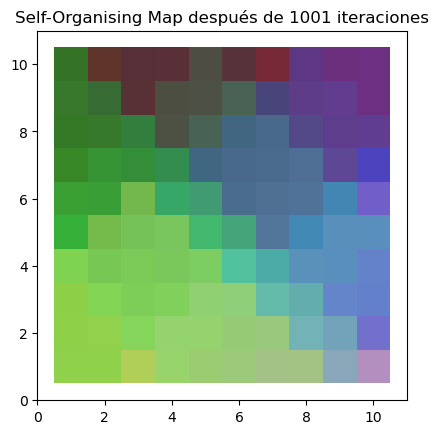

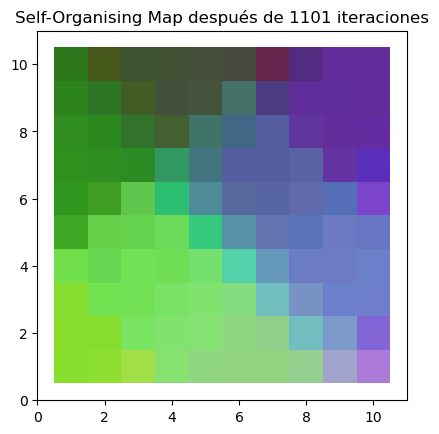

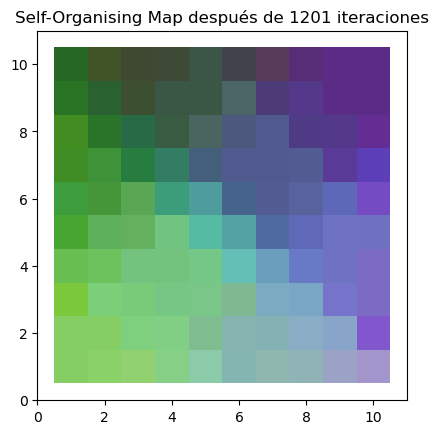

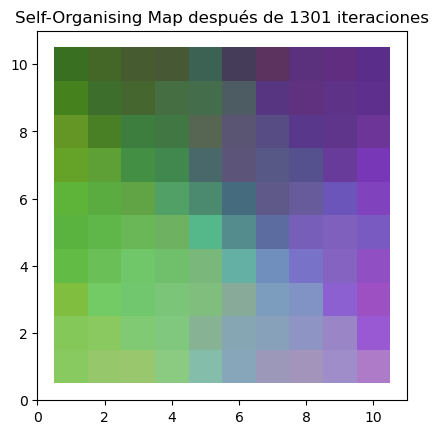

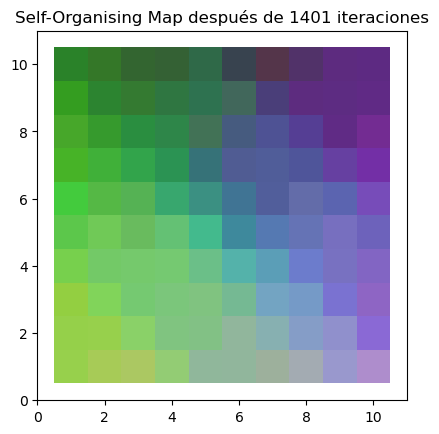

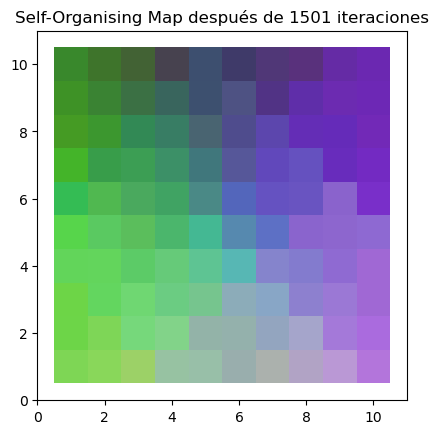

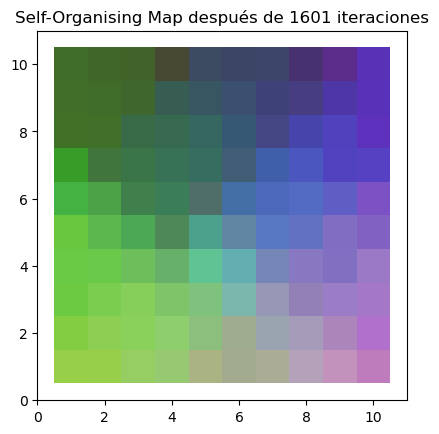

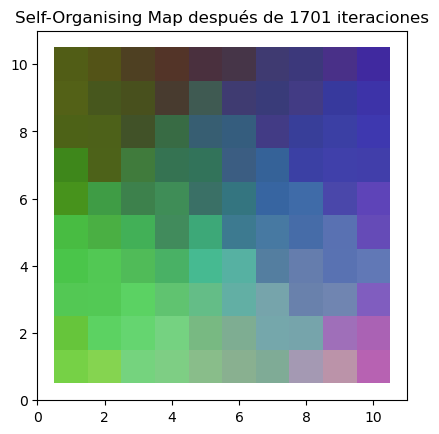

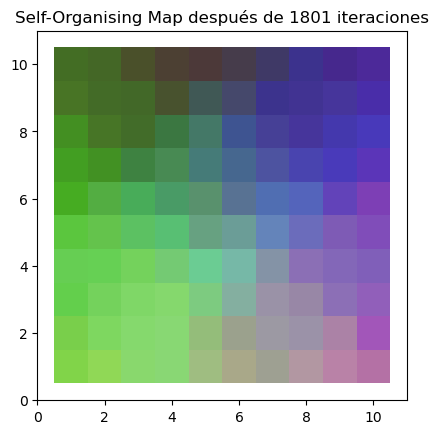

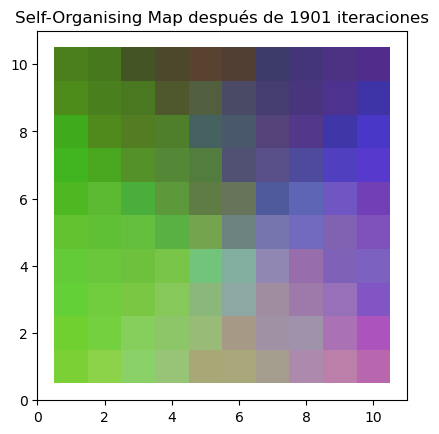

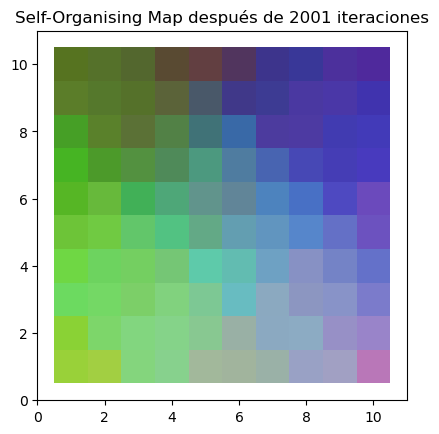

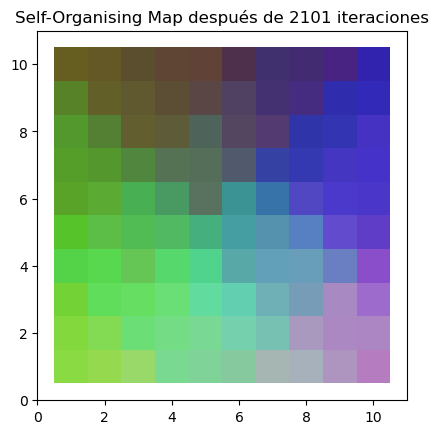

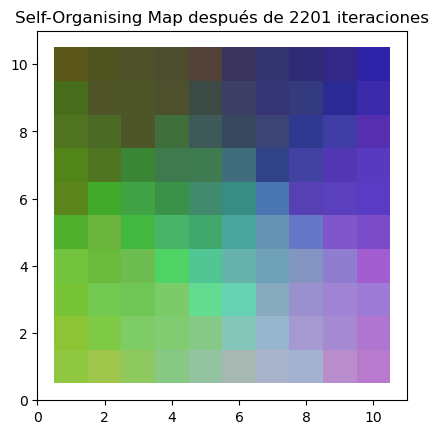

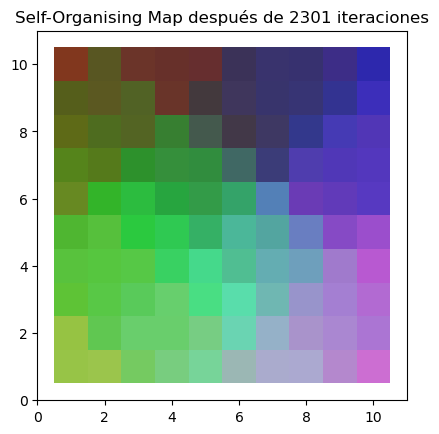

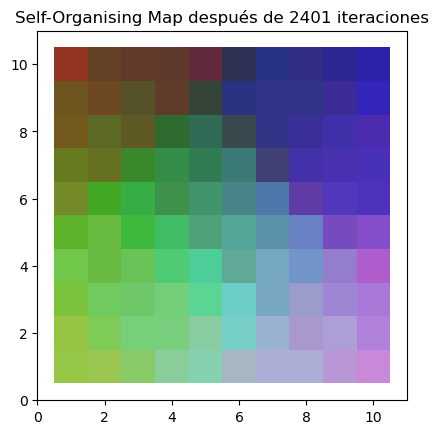

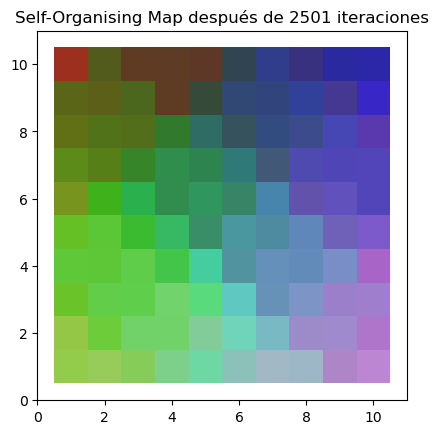

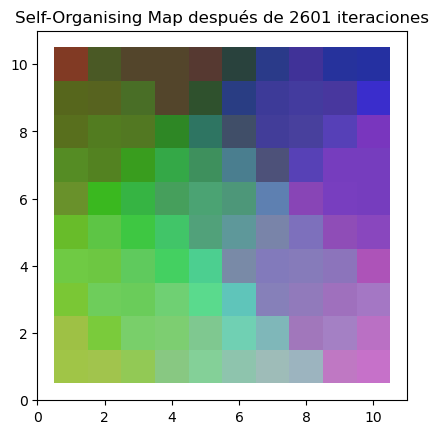

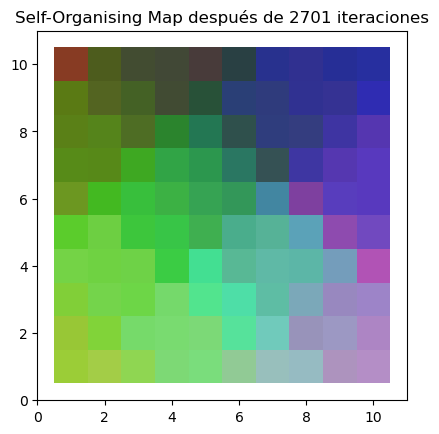

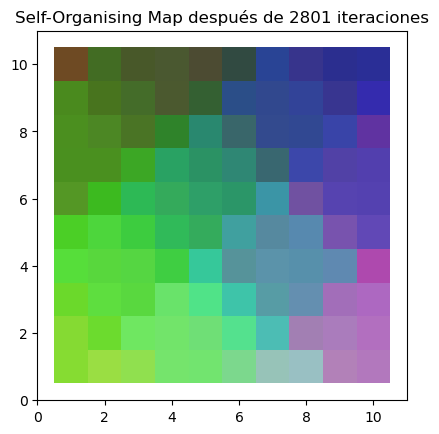

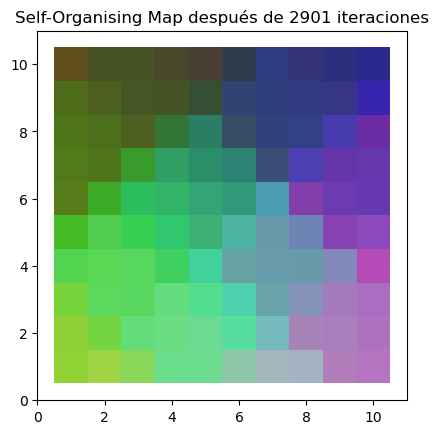

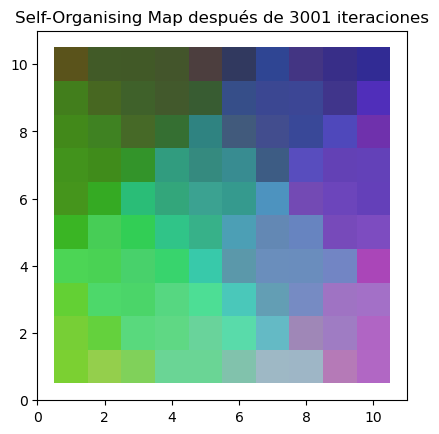

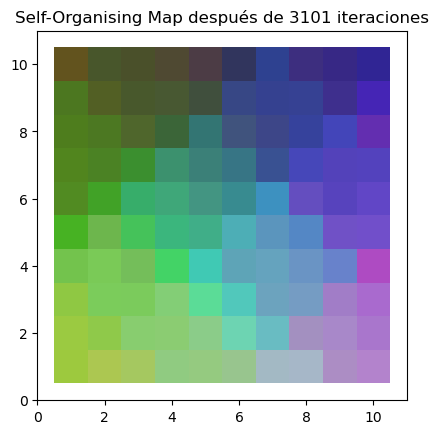

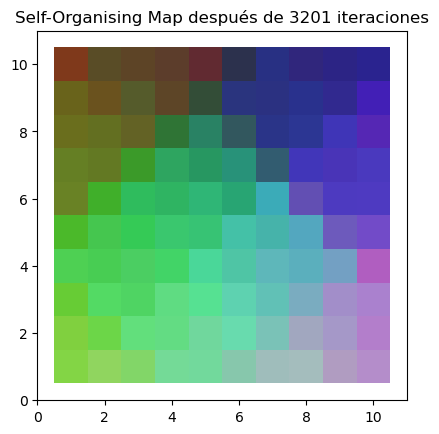

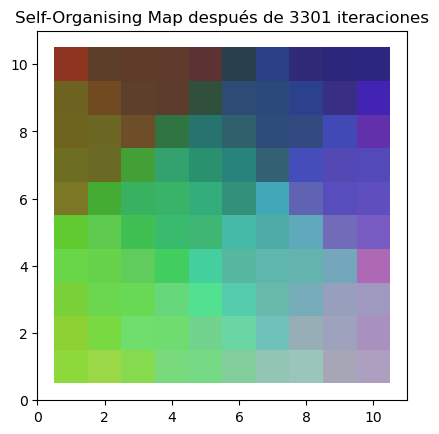

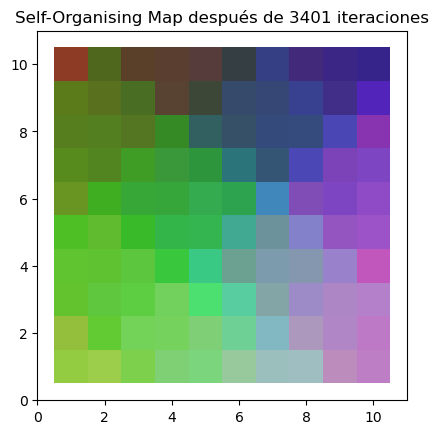

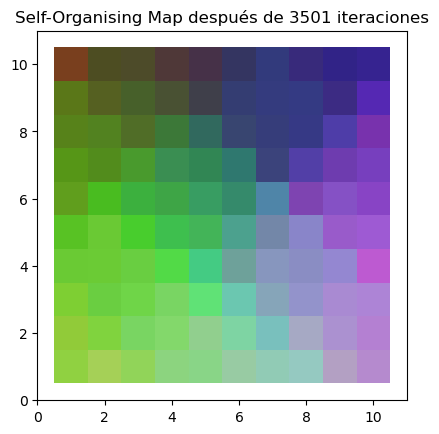

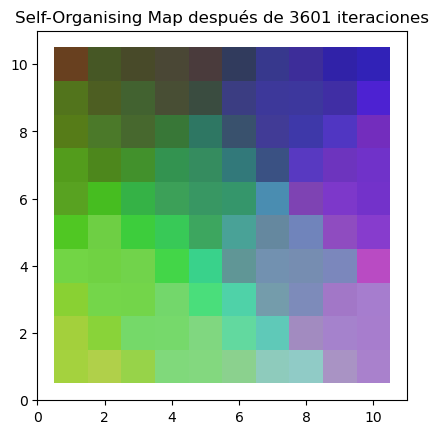

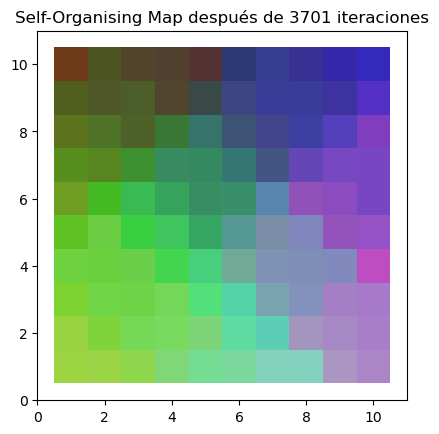

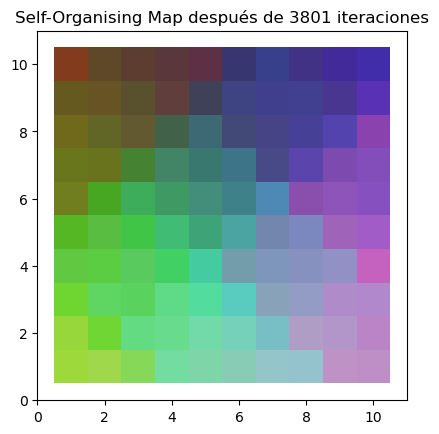

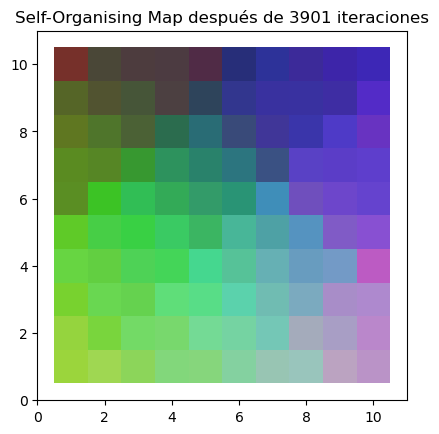

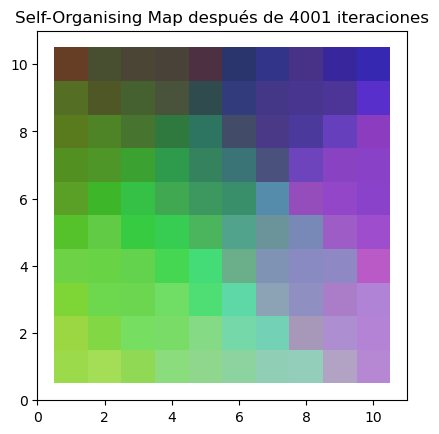

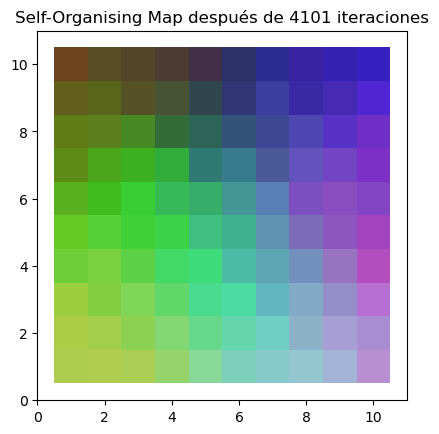

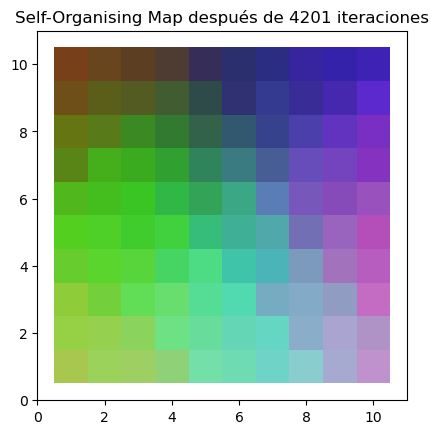

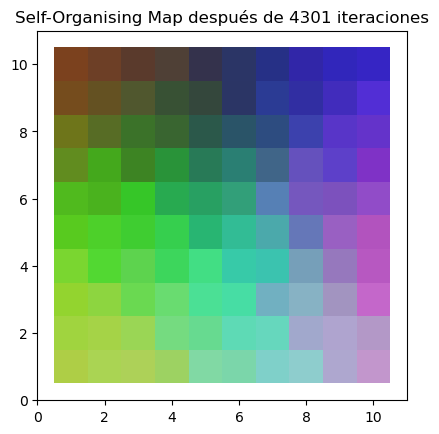

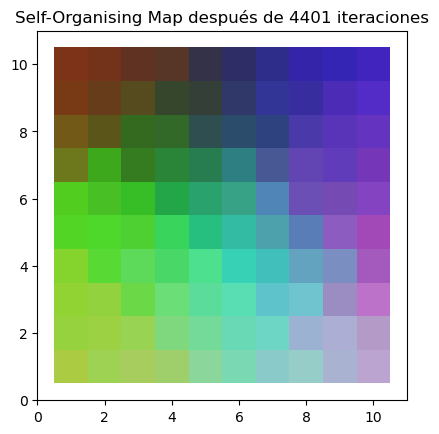

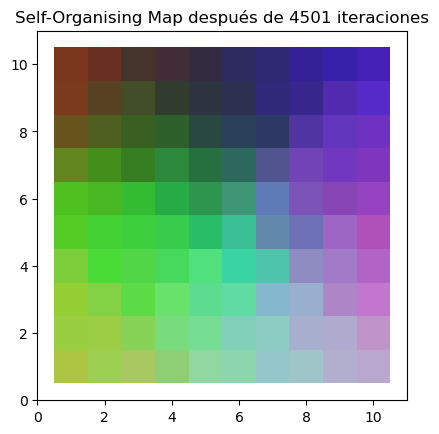

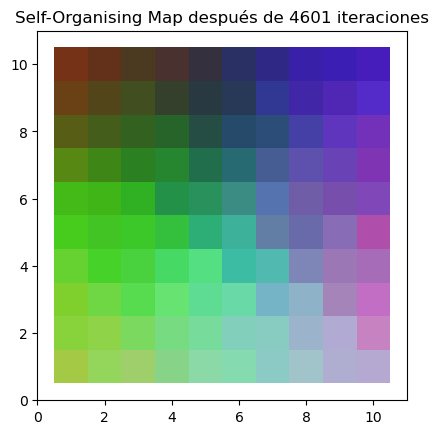

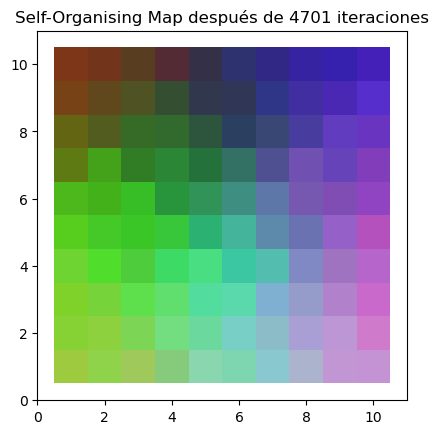

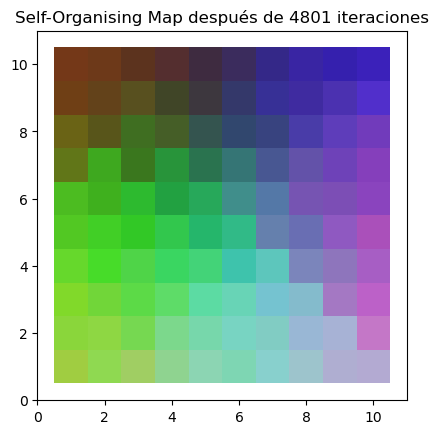

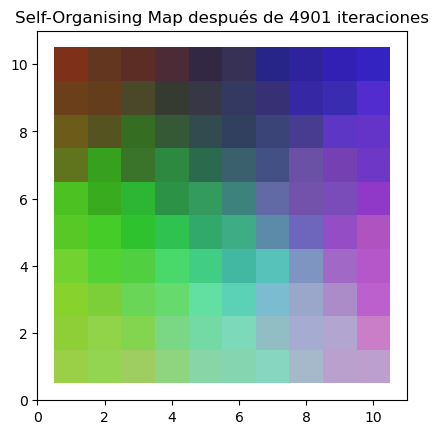

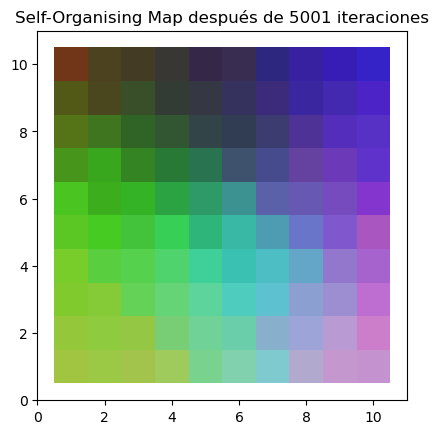

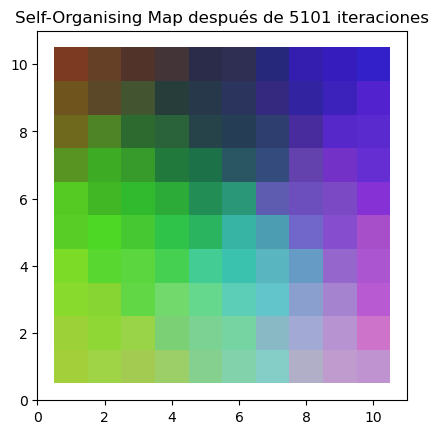

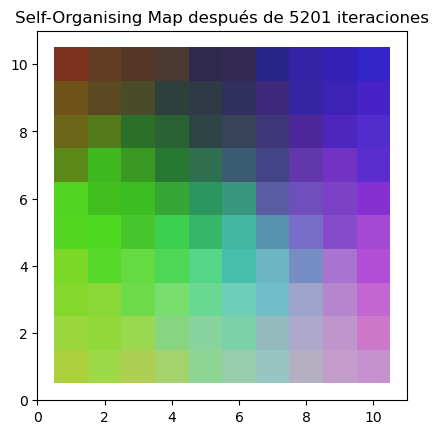

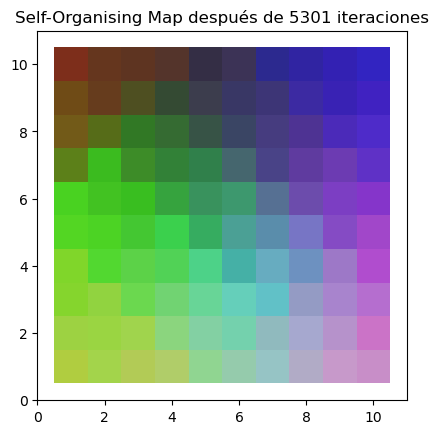

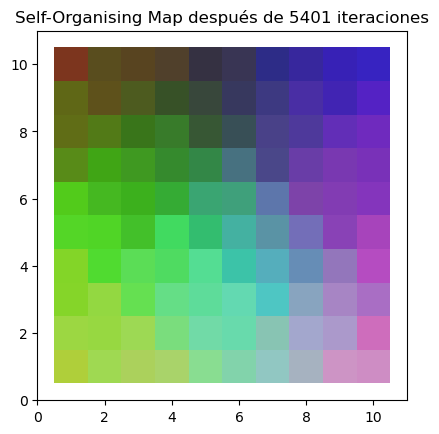

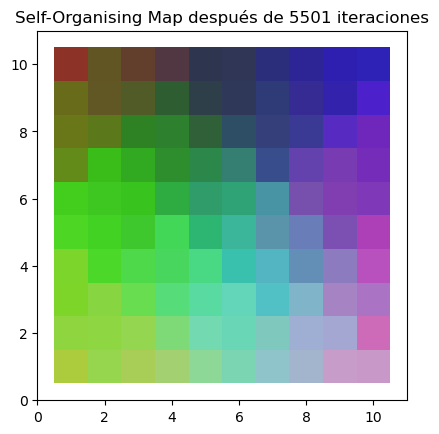

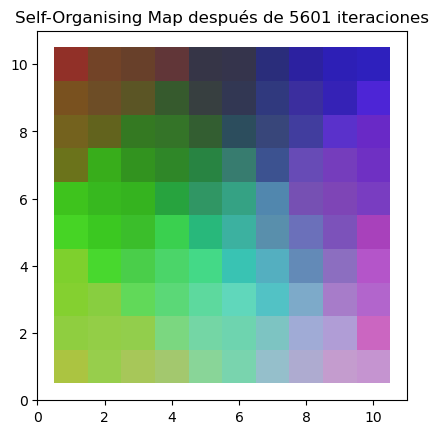

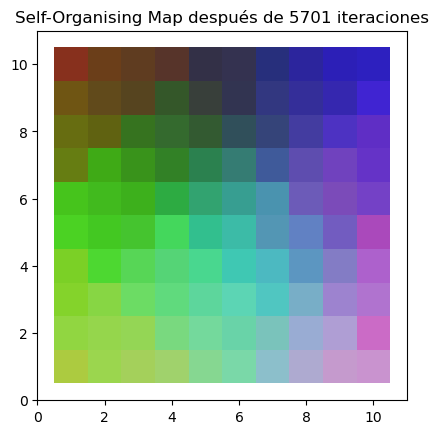

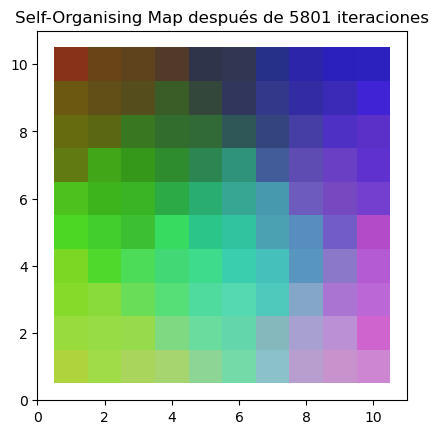

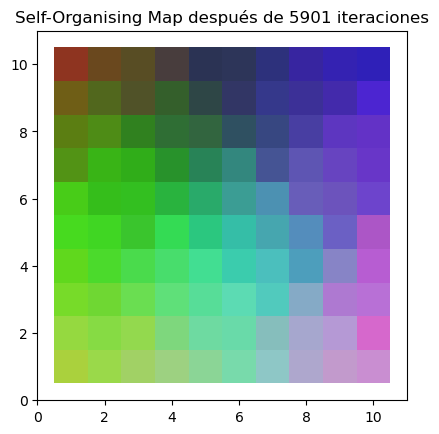

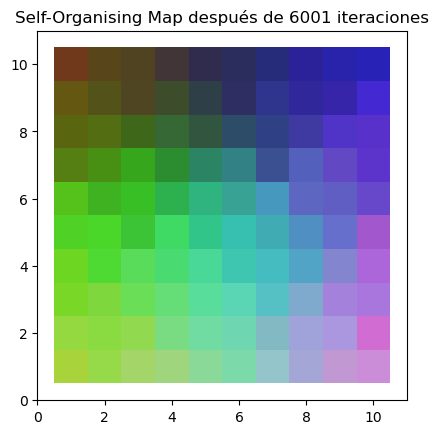

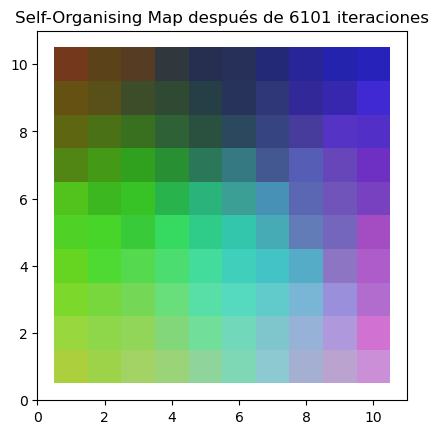

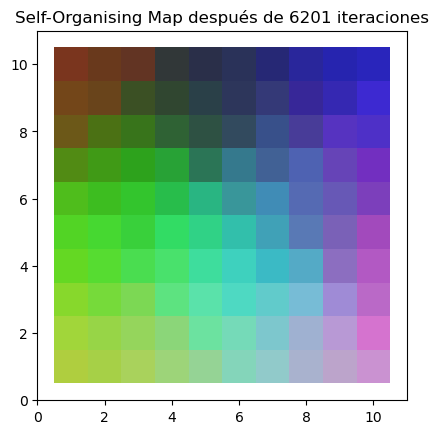

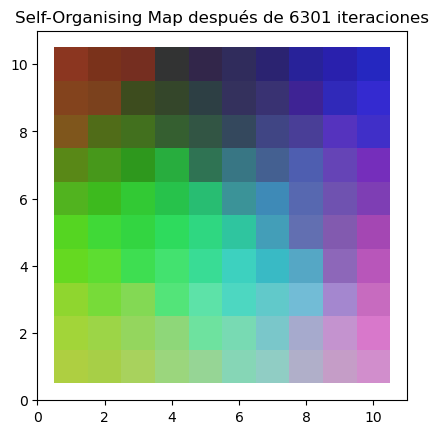

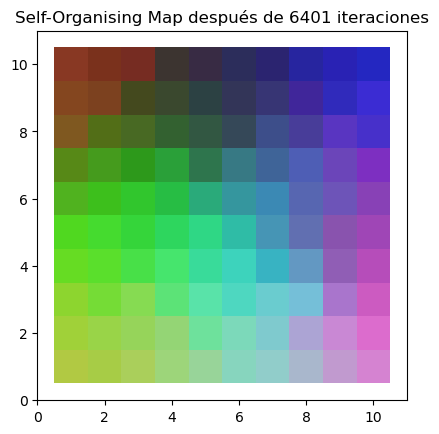

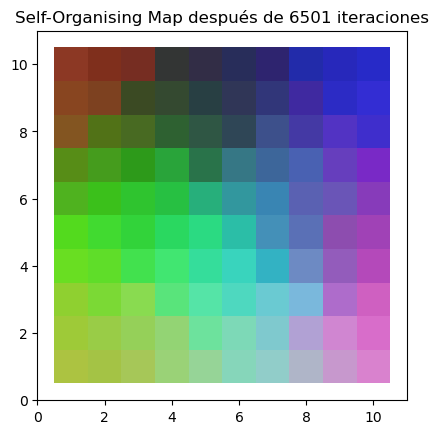

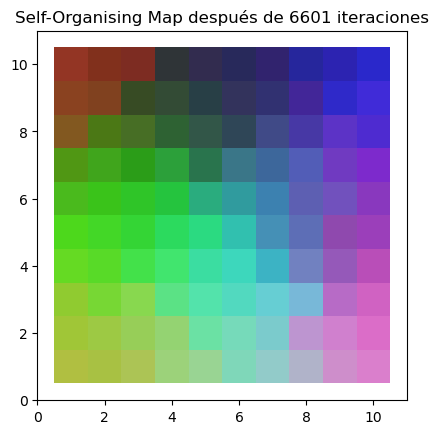

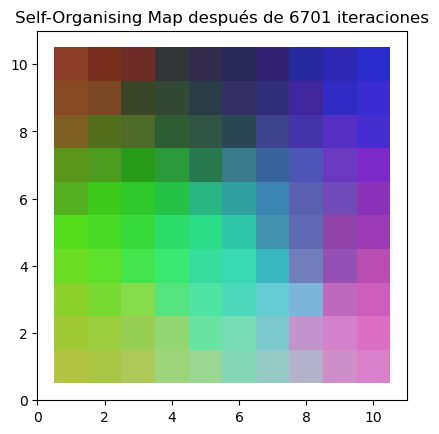

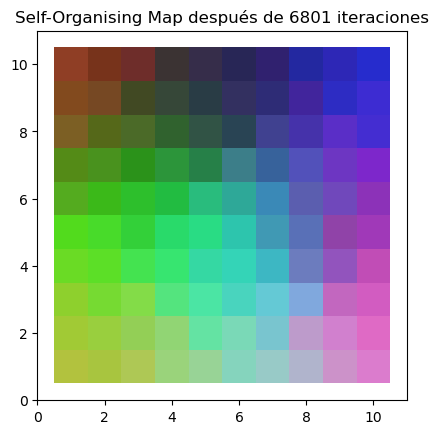

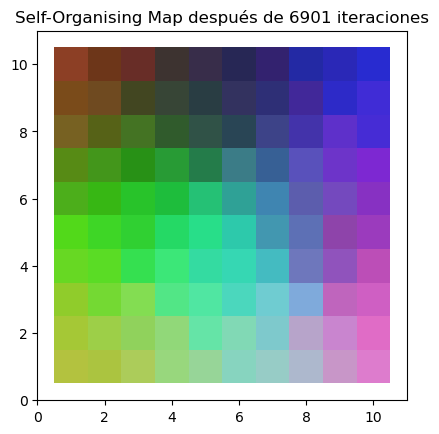

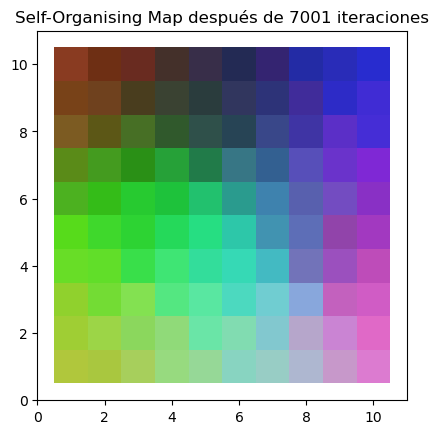

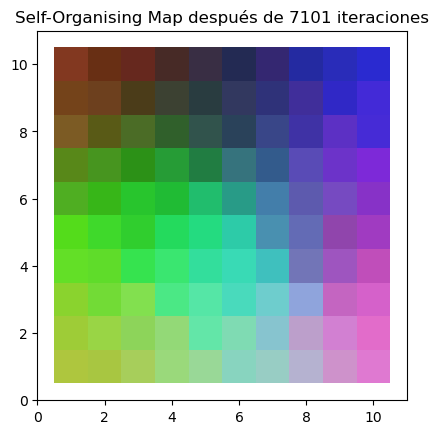

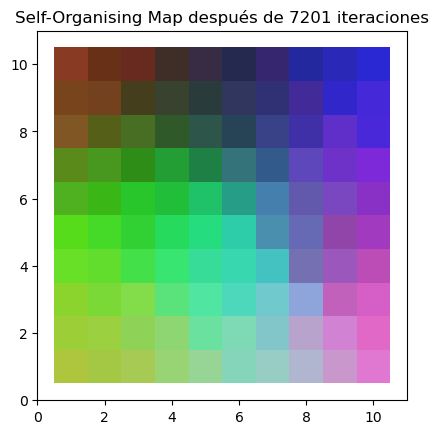

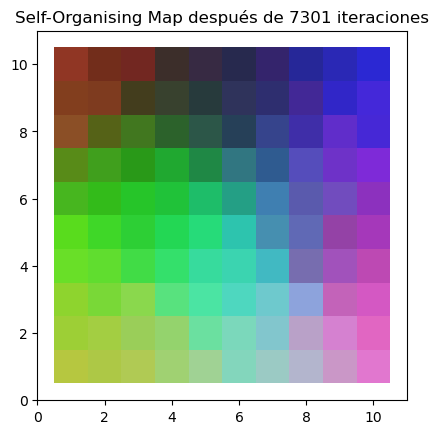

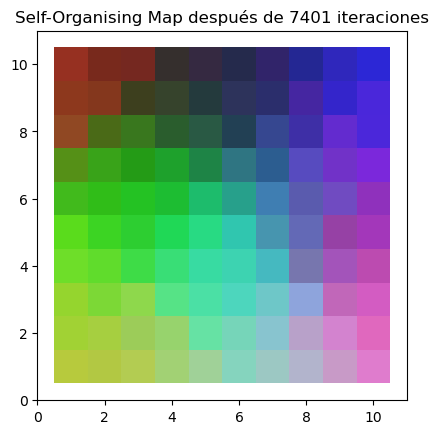

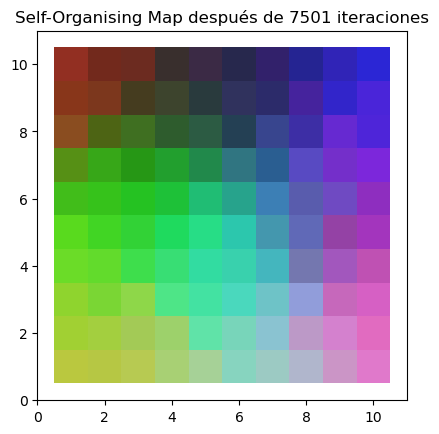

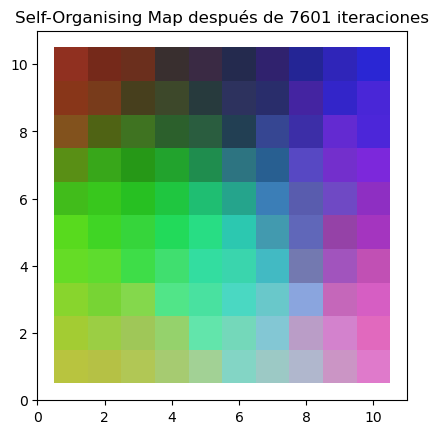

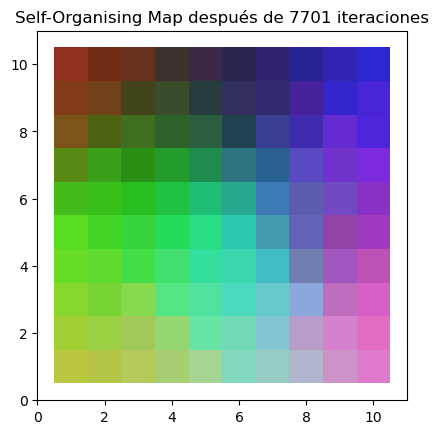

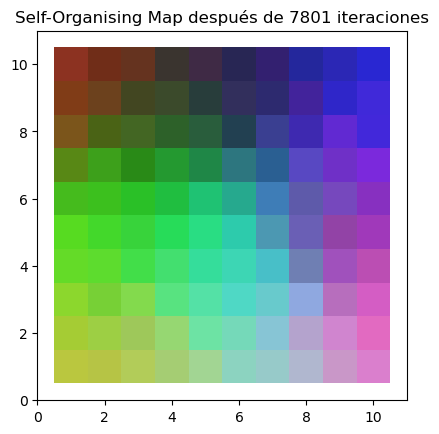

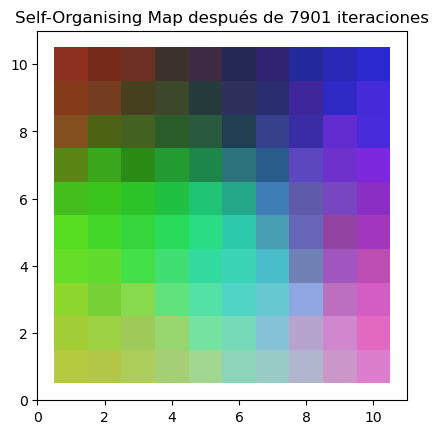

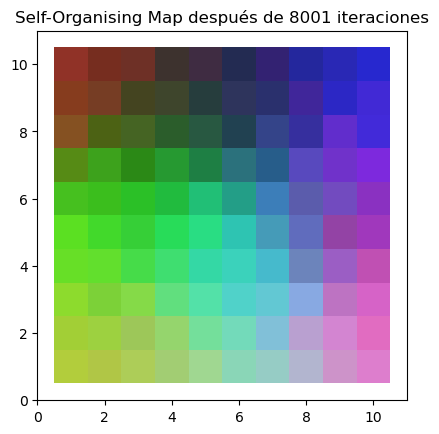

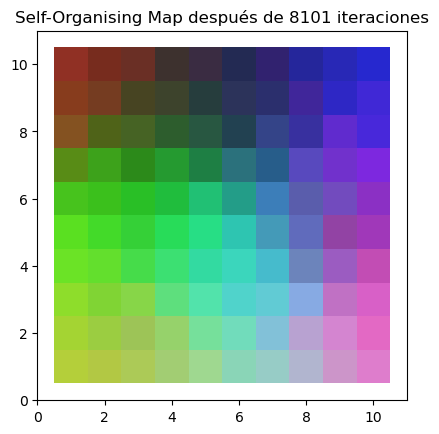

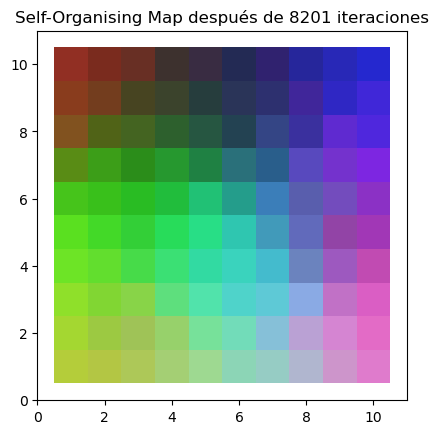

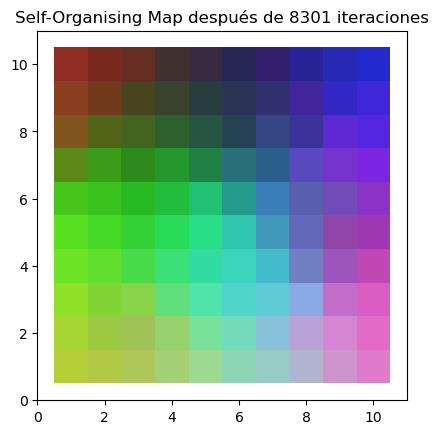

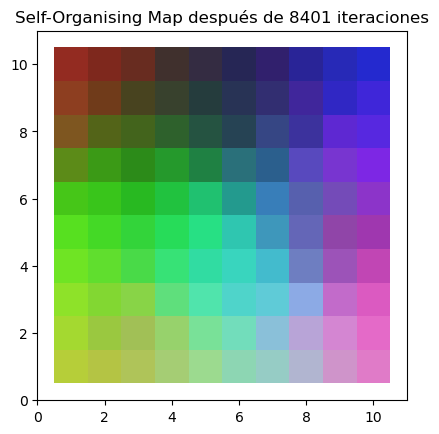

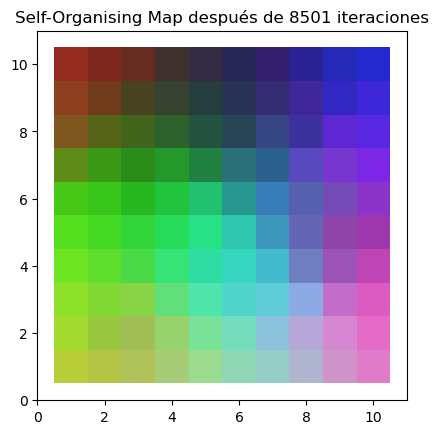

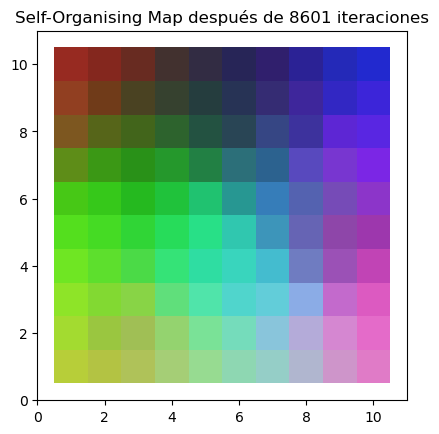

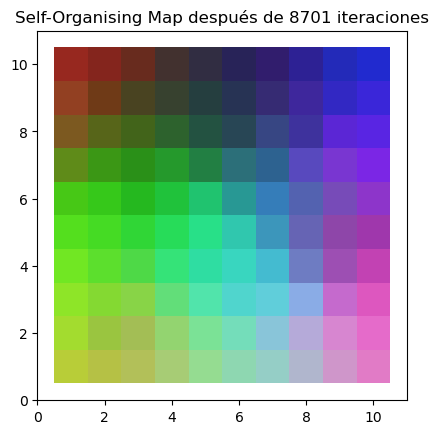

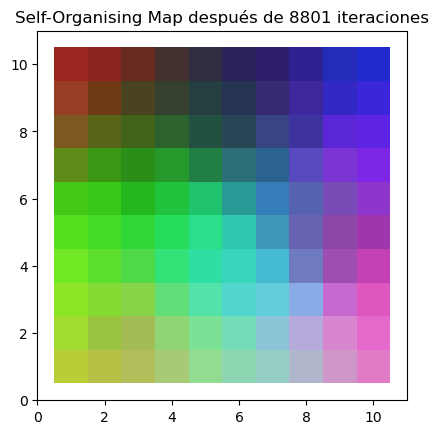

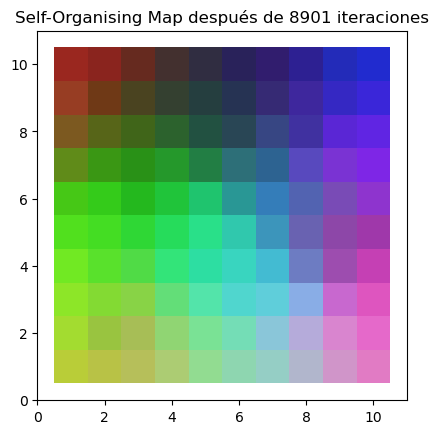

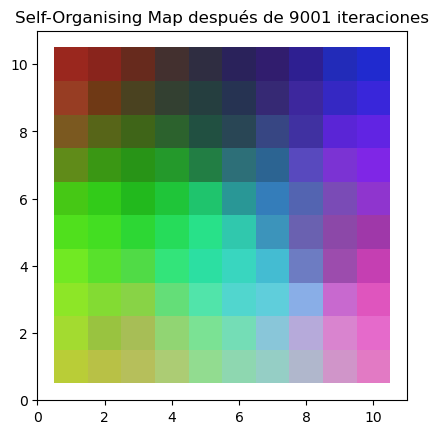

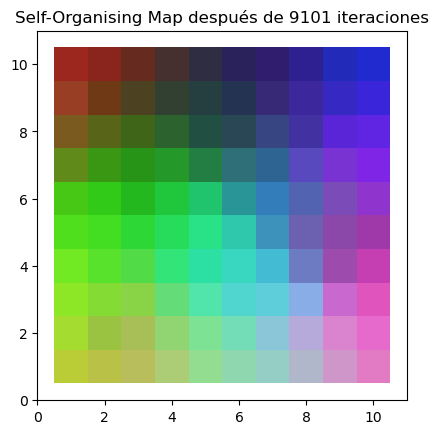

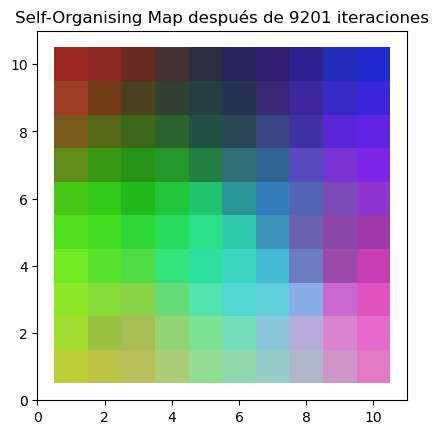

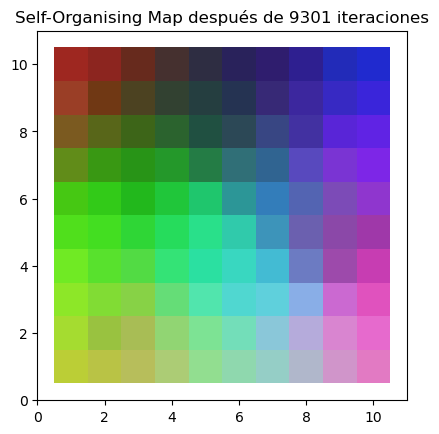

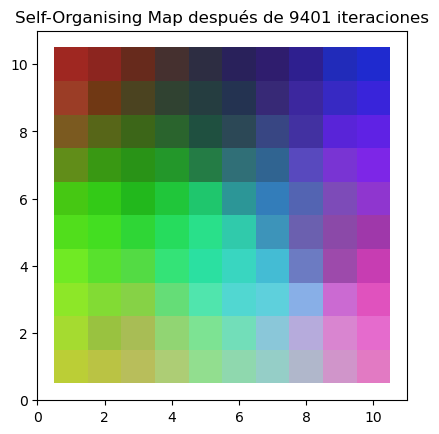

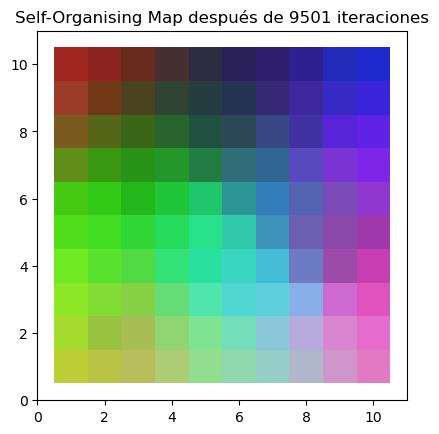

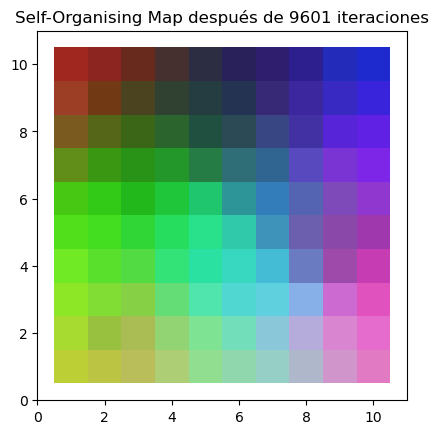

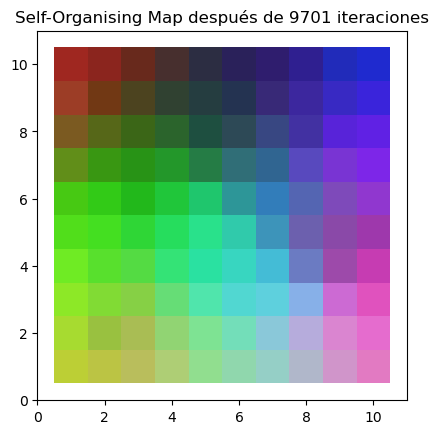

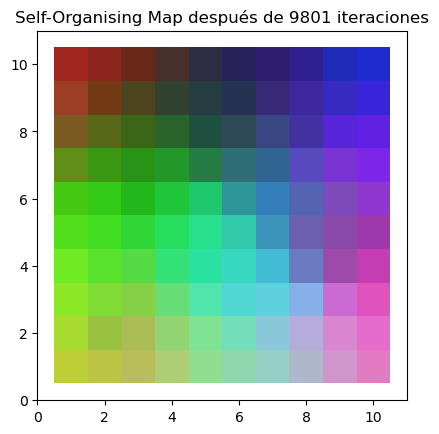

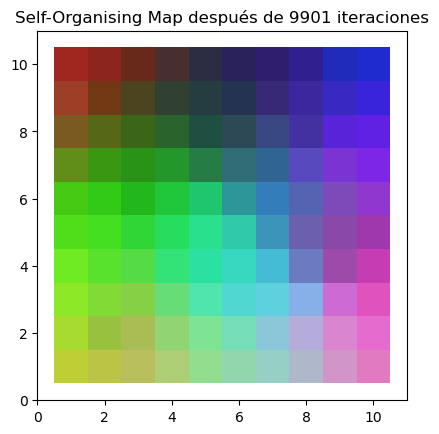

Entrenamiento completado


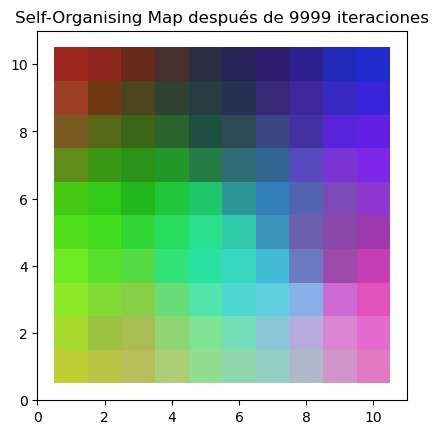

In [11]:
# Entrena la red con el dataset de entrenamiento
for step in range(periodo):
    if step == 0:
        print("Mapa inicial")
        pintar_mapa(matriz_pesos, step)
    if (step % 100 == 0) & (step != 0):
        pintar_mapa(matriz_pesos, step + 1)
    lr = variacion_learning_rate(learning_rate, step, periodo)
    vecin = variacion_vecindario(vecindario, step, periodo)
    numero = np.random.randint(0, 99)
    aleatorio = datos[numero]
    aleatorio = np.array(aleatorio)
    winner, dista = calcular_bmu(aleatorio, matriz_pesos, 3, lado_mapa, lado_mapa)
    
    for row in range(lado_mapa):
        for col in range(lado_mapa):
            sitio = np.array([row, col])
            distancia = distancia_euclidiana(matriz_pesos[winner[0], winner[1]], matriz_pesos[row, col])
            amort = decay(distancia, vecin)
            if dist(sitio, winner) <= vecin:
                matriz_pesos[row][col] += lr*amort*(aleatorio-matriz_pesos[row][col])
print("Entrenamiento completado")
pintar_mapa(matriz_pesos, step)

## SOM Clasificación

In [12]:
# Clasifica los patrones de entrenamiento con la matriz de pesos recién entrenada

# Creamos la matriz de clasificación
matrizClas = np.zeros((lado_mapa, lado_mapa, 3))

# Creamos la matriz de activaciones
matrizAct = np.zeros((lado_mapa, lado_mapa))

# Creamos la matriz de distancias
matrizDist = np.zeros((lado_mapa, lado_mapa))

# Número de clases
numClas = 0

tamNuevoDatos = 50

# Creamos set para clasificar
distanciaTotal = 0
datosClas = np.random.randint(0, 256, size=(tamNuevoDatos, 3))
datosClas = datosClas/255

# Clasificamos el nuevo set de datos de 50 colores con la matriz ya entrenada
for i in range(50):
    win, distancia = calcular_bmu(datos[i], matriz_pesos, 3, lado_mapa, lado_mapa)
    matrizClas[win[0], win[1]] = datos[i]
    matrizAct[win[0], win[1]] += 1
    matrizDist[win[0], win[1]] += distancia
    distanciaTotal += distancia
    print("La BMU para el patrón ", datos[i], " es ", win)
print("Ha terminado de clasificar")

# Imprimimos las BMU que se han activado para cada patrón

matrizDist = np.nan_to_num(matrizDist/matrizAct)
numClas = np.count_nonzero(matrizAct)
err = distanciaTotal/tamNuevoDatos

# Imprimimos el número de clases y el error.
# Si desea ver las matrices, por favor quite el comentario a las tres siguientes líneas de código.
#print("Matriz de clasificación: ", matrizClas)
#print("Matriz de activación: ", matrizAct)
#print("Matriz de distancias: ", matrizDist)
print("Número de clases: ", numClas)
print("El error es: ", err)



La BMU para el patrón  [0.58039216 0.80392157 0.78431373]  es  [6, 0]
La BMU para el patrón  [0.4627451  0.18039216 0.2627451 ]  es  [2, 9]
La BMU para el patrón  [0.34901961 0.02745098 0.94509804]  es  [9, 7]
La BMU para el patrón  [0.17254902 0.47058824 0.10196078]  es  [2, 7]
La BMU para el patrón  [0.46666667 0.83529412 0.14901961]  es  [1, 2]
La BMU para el patrón  [0.50196078 0.95294118 0.18431373]  es  [0, 2]
La BMU para el patrón  [0.10196078 0.45882353 0.71764706]  es  [6, 5]
La BMU para el patrón  [0.36470588 0.83529412 0.77647059]  es  [5, 2]
La BMU para el patrón  [0.6        0.92156863 0.60392157]  es  [4, 0]
La BMU para el patrón  [0.15294118 0.23921569 0.25098039]  es  [4, 8]
La BMU para el patrón  [0.34509804 0.96862745 0.16470588]  es  [1, 3]
La BMU para el patrón  [0.05098039 0.12941176 0.34509804]  es  [5, 9]
La BMU para el patrón  [0.3372549  0.13333333 0.03529412]  es  [2, 9]
La BMU para el patrón  [0.32941176 0.05882353 0.97254902]  es  [9, 7]
La BMU para el patró

C:\Users\Usuario\AppData\Local\Temp\ipykernel_7292\2089975033.py:34: RuntimeWarning: invalid value encountered in true_divide
  matrizDist = np.nan_to_num(matrizDist/matrizAct)


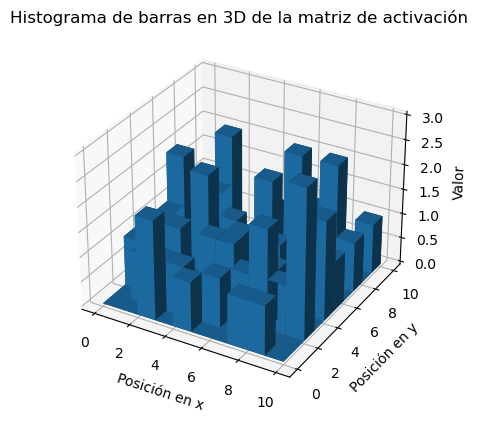

In [23]:
# Crear las coordenadas x, y y z para las barras
x, y = np.meshgrid(np.arange(matrizAct.shape[0]), np.arange(matrizAct.shape[1]))
z = matrizAct.flatten()

# Crear un gráfico 3D de barras
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.bar3d(x.ravel(), y.ravel(), np.zeros_like(z), 1, 1, z)

# Establecer etiquetas y título
ax.set_xlabel('Posición en x')
ax.set_ylabel('Posición en y')
ax.set_zlabel('Valor')
ax.set_title('Histograma de barras en 3D de la matriz de activación')

# Mostrar el gráfico
plt.show()

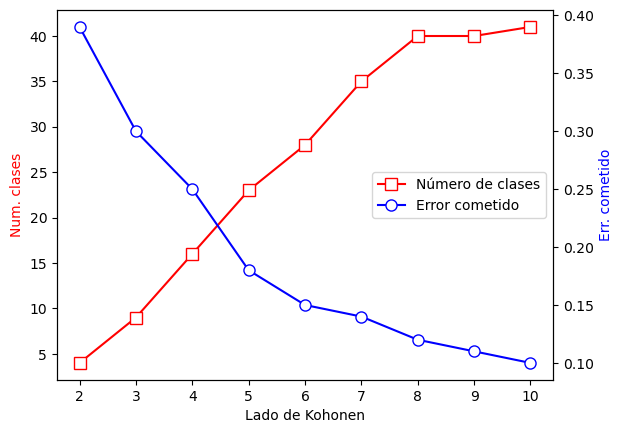

In [143]:
# A base de prueba y error, guardamos los valores del error, el número de clases por lado del mapa
# para poder crear una gráfica que muestre los errores y las clases con su lado de Kohonen.

ladoKohonen = [2, 3, 4, 5, 6, 7, 8, 9, 10]
ladoKohonen = np.array(ladoKohonen)
numeroClases = [4, 9, 16, 23, 28, 35, 40, 40, 41]
numeroClases = np.array(numeroClases)
errorCometido = [0.39, 0.3, 0.25, 0.18, 0.15, 0.14, 0.12, 0.11, 0.1]

# Crear la figura y los ejes
fig, ax1 = plt.subplots()

# Crear el segundo eje y asociarlo con el primer eje
ax2 = ax1.twinx()

# Crear las líneas de datos y asociarlas con los ejes correspondientes
line1, = ax1.plot(ladoKohonen, numeroClases, '-s', markerfacecolor='white', markersize=8, color='red', label='Número de clases')
line2, = ax2.plot(ladoKohonen, errorCometido, '-o', markerfacecolor='white', markersize=8, color='blue', label='Error cometido')

# Configurar los ejes y las etiquetas
ax1.set_xlabel('Lado de Kohonen')
ax1.set_ylabel('Num. clases', color='red')
ax2.set_ylabel('Err. cometido', color='blue')

# Agregar leyendas
lines = [line1, line2]
ax1.legend(lines, [l.get_label() for l in lines], loc = 'right')

# Mostrar la gráfica
plt.show()

Como podemos ver, con los valores previamente calculados a base de probar diferentes combinaciones, podemos observar que el valor más adecuado es un lado de mapa de Kohonen (k) de 10 y periodo 10000, ya que estabiliza el número de clases y baja el error a 0.1

## SOM Prueba

In [19]:
# Clasifica nuevos patrones
# Clasificamos con la misma matriz de pesos entrenada los 8 colores propuestos en el enunciado
# Creamos las variables

matrizClasPrueba = np.zeros((lado_mapa, lado_mapa, 3))
matrizActPrueba = np.zeros((lado_mapa, lado_mapa))
matrizDistPrueba = np.zeros((lado_mapa, lado_mapa))
mapaPrueba = np.zeros((lado_mapa, lado_mapa, 3))
distanciaTotalPrueba = 0
    
datosPrueba = ([[255, 255, 255], [255, 0, 0], [0, 255, 0], [0, 0, 255], [255, 255, 0], [255, 0, 255], [0, 255, 255],
               [0, 0, 0]])
datosPrueba = np.array(datosPrueba)
datosPrueba = datosPrueba/255

La BMU para el patrón  [1. 1. 1.]  es  [7, 1]
La BMU para el patrón  [1. 0. 0.]  es  [0, 9]
La BMU para el patrón  [0. 1. 0.]  es  [1, 5]
La BMU para el patrón  [0. 0. 1.]  es  [9, 9]
La BMU para el patrón  [1. 1. 0.]  es  [0, 0]
La BMU para el patrón  [1. 0. 1.]  es  [9, 2]
La BMU para el patrón  [0. 1. 1.]  es  [5, 3]
La BMU para el patrón  [0. 0. 0.]  es  [4, 9]
Ha terminado de clasificar


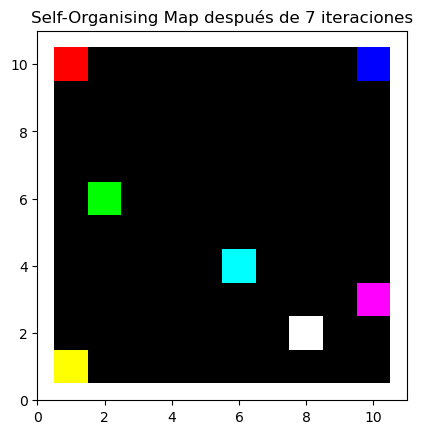

El número de clases son:  8
El error es:  0.37393884113548065


In [20]:
# Clasificamos con la matriz e imprimimos las BMU
# Además, pintamos los colores en el mapa

for i in range(datosPrueba.shape[0]):
    win, distancia = calcular_bmu(datosPrueba[i], matriz_pesos, 3, lado_mapa, lado_mapa)
    matrizClasPrueba[win[0], win[1]] = datosPrueba[i]
    matrizActPrueba[win[0], win[1]] += 1
    matrizDistPrueba[win[0], win[1]] += distancia
    mapaPrueba[win[0], win[1]] = datosPrueba[i]
    distanciaTotalPrueba += distancia
    print("La BMU para el patrón ", datosPrueba[i], " es ", win)
print("Ha terminado de clasificar")
pintar_mapa(mapaPrueba, i)
numClasPrueba = np.count_nonzero(matrizActPrueba)

# Quitar el comentario si se quieren ver las matrices
#print(matrizClasPrueba)
#print(matrizActPrueba)
#print(matrizDistPrueba)
print("El número de clases son: ", numClasPrueba)
print("El error es: ", distanciaTotalPrueba/datosPrueba.shape[0]) 



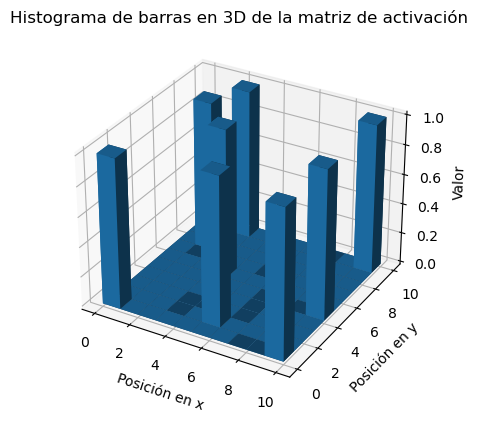

In [22]:
# Crear las coordenadas x, y y z para las barras
x, y = np.meshgrid(np.arange(matrizActPrueba.shape[0]), np.arange(matrizActPrueba.shape[1]))
z = matrizActPrueba.flatten()

# Crear un gráfico 3D de barras
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.bar3d(x.ravel(), y.ravel(), np.zeros_like(z), 1, 1, z)

# Establecer etiquetas y título
ax.set_xlabel('Posición en x')
ax.set_ylabel('Posición en y')
ax.set_zlabel('Valor')
ax.set_title('Histograma de barras en 3D de la matriz de activación')

# Mostrar el gráfico
plt.show()

El error es más grande a la hora de clasificar puesto que los datos son más extremos que el dataset de entrenamiento y de prueba. Pero mirando el mapa de los colores de prueba, podemos ver que los clasifica correctamente mirando el mapa de pesos de la red de Kohonen después del entrenamiento

Asimismo, si miramos la matriz de pesos después de que complete el entrenamiento, podemos comprobar que los colores de prueba que hemos introducido ahora, coinciden los colores con los de la matriz pintada al acabar el entrenamiento.